# Titanic challenge first approach

V8.0



## Steps to follow
* Library import
* Data ingestion
* Data analysis
    * Graphic visualization
    * Correlation analysis 
* Data cleaning and depuration
    * Nans filling
    * Value normalization
    * Categorical data codification
* ML model fitting
    * Training and test data split
    * Model selection
    * Model training
* ML model optimization
    * Grid search optimization
    * Metrics analysis

# Library import

In [171]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Data ingestion

In [172]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


After data ingestion and a quick visualization we can address the following conclusions:
* Column [0] is the passenger ID, not a valuable data. We can delete it from the dataset.
* Column [1] is the label of the problem. If a passenger survived it's represented with a 1. A no-survived passenger with a 0. 
* Column [3] is the passenger Class. It's easy to think that this is a very valuable/determinant data to predict a passenger survival.
* Column [4] is the passenger Name. Is not trivial to think if the name can help in the prediction process.
* Column [5] is the passenger Sex. Clearly it could be a valuable data.
* Column [6] is the number of siblings/spouses that the passenger have. Possibly a valuable prediction data.
* Column [7] is the number of parent/children the the passenger have. Same as column [6]
* Column [8] is the ticket number. Random numbers, possibly it hasn't influence in the label result.
* Column [9] is the price of the ticket. It could be a valuable data for the prediction.
* Column [10] is the cabin number. Low o null influence, random numbers.
* Column [11] is the port where the passenger embarked. Possibly it can influence due a social class influece depending the cities.

# Data analysis

Lets see the influence of the class in the survival probability

In [173]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* There are null values in some of the features

## Pcclass vs survived

* There are 3 total ticket classes
* Class 1 is the highest socio-economic status

Lets count the survival and no survival passengers of each class, then plot the results

In [174]:
class1 = df_train[df_train.Pclass == 1] 

c1_surv = class1[class1.Survived == 1].Survived.count()
c1_no_surv = class1[class1.Survived == 0].Survived.count()

class2 = df_train[df_train.Pclass == 2] 

c2_surv = class2[class2.Survived == 1].Survived.count()
c2_no_surv = class2[class2.Survived == 0].Survived.count()

class3 = df_train[df_train.Pclass == 3] 

c3_surv = class3[class3.Survived == 1].Survived.count()
c3_no_surv = class3[class3.Survived == 0].Survived.count()

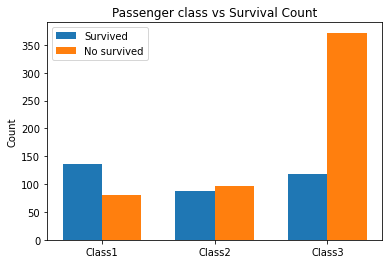

In [175]:
labels = ['Class1', 'Class2', 'Class3']
survived = [c1_surv, c2_surv, c3_surv]
no_survived = [c1_no_surv, c2_no_surv, c3_no_surv]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, survived, width, label='Survived')
rects2 = ax.bar(x + width/2, no_survived, width, label='No survived')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Passenger class vs Survival Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


plt.show()

We can see that the class 3 (lowest socio-economic) has the highest number of passengers. Also is the class with the highest no survived ratio.
Now calculate the percent of survival for each class

In [176]:
a = c1_surv/(c1_surv+c1_no_surv) #Percent of survival
b = c2_surv/(c2_surv+c2_no_surv)
c = c3_surv/(c3_surv+c3_no_surv)
print('Class 1 survival percent = ', a*100)
print('Class 2 survival percent = ', b*100)
print('Class 2 survival percent = ', c*100)

Class 1 survival percent =  62.96296296296296
Class 2 survival percent =  47.28260869565217
Class 2 survival percent =  24.236252545824847


Finally we can conclude: 
* The highest the social class, highest survival probability
* Class 3 is the lowest social class

## Sex vs survived

Is necesary to find correlation between sex and survival probability and also with the Pclass

* First we are going to plot the global sex vs survived results
* Then sex class vs survived

In [177]:
fem_surv = df_train.loc[(df_train.Sex == 'female') & (df_train.Survived == 1), 'Survived'].count()
fem_no_surv = df_train.loc[(df_train.Sex == 'female') & (df_train.Survived == 0), 'Survived'].count()

mal_surv = df_train.loc[(df_train.Sex == 'male') & (df_train.Survived == 1), 'Survived'].count()
mal_no_surv = df_train.loc[(df_train.Sex == 'male') & (df_train.Survived == 0), 'Survived'].count()

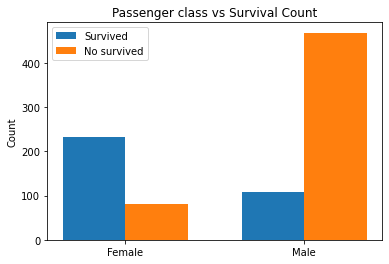

In [178]:
labels = ['Female', 'Male']
survived = [fem_surv, mal_surv]
no_survived = [fem_no_surv, mal_no_surv]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, survived, width, label='Survived')
rects2 = ax.bar(x + width/2, no_survived, width, label='No survived')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Passenger class vs Survival Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


plt.show()

The graph is showing us very interesting data. 
* There are more mans than women 
* Womens has the most survival rate 
* Male gender survival rate is very low

In [179]:
a = fem_surv / (fem_surv + fem_no_surv)
b = mal_surv / (mal_surv + mal_no_surv)

print('Female survival percent = ', a*100)
print('Male survival percent = ', b*100)

Female survival percent =  74.20382165605095
Male survival percent =  18.890814558058924


Now we are going to analize using Pclass and gender at the same time

In [180]:
sex_class_surv = np.zeros((2,3))

for i in range(1,4):
    
    Pclass = df_train[df_train.Pclass == i] 

    fem = Pclass[Pclass.Sex == 'female']
    mal = Pclass[Pclass.Sex == 'male']

    sex_class_surv[0, i-1] = fem[fem.Survived == 1].Survived.count() / (fem[fem.Survived == 1].Survived.count() + fem[fem.Survived == 0].Survived.count())

    sex_class_surv[1, i-1] = mal[mal.Survived == 1].Survived.count() / (mal[mal.Survived == 1].Survived.count() + mal[mal.Survived == 0].Survived.count())

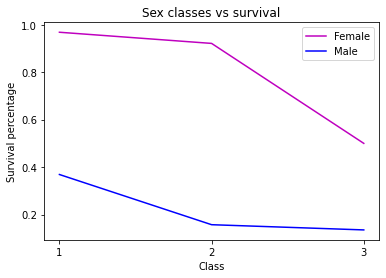

In [181]:
plt.plot([1,2,3], sex_class_surv[0], 'm-', label = 'Female')
plt.plot([1,2,3], sex_class_surv[1], 'b-', label = 'Male')
plt.xticks([1,2,3])
plt.xlabel('Class')
plt.ylabel('Survival percentage')
plt.title('Sex classes vs survival')
plt.legend()
plt.show()

In [182]:
print('Female survival rate --> Class 1 = ',sex_class_surv[0,0], ' Class 2 = ', sex_class_surv[0,1], 'Class 3 = ', sex_class_surv[0,2])
print('Male survival rate --> Class 1 = ',sex_class_surv[1,0], ' Class 2 = ', sex_class_surv[1,1], 'Class 3 = ', sex_class_surv[1,2])

Female survival rate --> Class 1 =  0.9680851063829787  Class 2 =  0.9210526315789473 Class 3 =  0.5
Male survival rate --> Class 1 =  0.36885245901639346  Class 2 =  0.1574074074074074 Class 3 =  0.13544668587896252


* It is evident from the plot that no matter what de Passenger class was, the Female gender had the highest survival ratio.
* Again the highest the social-economic class, higher the survival ratio

# Age vs survived

The idea is find correlation in the age data and the survival count.
* Before data analysis we need to fill the Nans values in the dataframe

In [183]:
df_train.Age.isna().sum()

177

Acordint to the dataframe info() function, we have 177 Nan values in the Age column.

### AGE NANS FILLING
    * The idea is to use the mean age of men/female of each class to fill the empty values.

In [184]:
pclass1_fem = (df_train[(df_train.Pclass == 1) & (df_train.Sex == 'female')]).Age.mean()
pclass1_mal = (df_train[(df_train.Pclass == 1) & (df_train.Sex == 'male')]).Age.mean()

pclass2_fem = (df_train[(df_train.Pclass == 2) & (df_train.Sex == 'female')]).Age.mean()
pclass2_mal = (df_train[(df_train.Pclass == 2) & (df_train.Sex == 'male')]).Age.mean()

pclass3_fem = (df_train[(df_train.Pclass == 3) & (df_train.Sex == 'female')]).Age.mean()
pclass3_mal = (df_train[(df_train.Pclass == 3) & (df_train.Sex == 'male')]).Age.mean()

print('Female Pclass1 mean Age = ', pclass1_fem, 'Male Pclass1 mean Age = ', pclass1_mal,
      '\n Female Pclass2 mean Age = ', pclass2_fem, 'Male Pclass2 mean Age = ', pclass2_mal,
      '\n Female Pclass1 mean Age = ', pclass3_fem, 'Male Pclass1 mean Age = ', pclass3_mal)


Female Pclass1 mean Age =  34.61176470588235 Male Pclass1 mean Age =  41.28138613861386 
 Female Pclass2 mean Age =  28.722972972972972 Male Pclass2 mean Age =  30.74070707070707 
 Female Pclass1 mean Age =  21.75 Male Pclass1 mean Age =  26.507588932806325


We have now a more accurate mean age for each class and sex. Every value needs to be replace in the corresponding age Nan. 

In [185]:
df_train.loc[(df_train.Pclass == 1) & (df_train.Sex == 'female'), 'Age'] = (df_train[(df_train.Pclass == 1) & (df_train.Sex == 'female')]).Age.fillna(pclass1_fem)
df_train.loc[(df_train.Pclass == 1) & (df_train.Sex == 'male'), 'Age'] = (df_train[(df_train.Pclass == 1) & (df_train.Sex == 'male')]).Age.fillna(pclass1_mal)

df_train.loc[(df_train.Pclass == 2) & (df_train.Sex == 'female'), 'Age'] = (df_train[(df_train.Pclass == 2) & (df_train.Sex == 'female')]).Age.fillna(pclass2_fem)
df_train.loc[(df_train.Pclass == 2) & (df_train.Sex == 'male'), 'Age'] = (df_train[(df_train.Pclass == 2) & (df_train.Sex == 'male')]).Age.fillna(pclass2_mal)

df_train.loc[(df_train.Pclass == 3) & (df_train.Sex == 'female'), 'Age'] = (df_train[(df_train.Pclass == 3) & (df_train.Sex == 'female')]).Age.fillna(pclass3_fem)
df_train.loc[(df_train.Pclass == 3) & (df_train.Sex == 'male'), 'Age'] = (df_train[(df_train.Pclass == 3) & (df_train.Sex == 'male')]).Age.fillna(pclass3_mal)

In [186]:
df_train.Age.isna().sum()

0

Now we have a complete Age column to analize.

Then repeat the same process to the test dataframe..

In [187]:
df_test.Age.isnull().sum()

86

In [188]:
df_test.loc[(df_test.Pclass == 1) & (df_test.Sex == 'female'), 'Age'] = (df_test[(df_test.Pclass == 1) & (df_test.Sex == 'female')]).Age.fillna(pclass1_fem)
df_test.loc[(df_test.Pclass == 1) & (df_test.Sex == 'male'), 'Age']   = (df_test[(df_test.Pclass == 1) & (df_test.Sex == 'male')]).Age.fillna(pclass1_mal)

df_test.loc[(df_test.Pclass == 2) & (df_test.Sex == 'female'), 'Age'] = (df_test[(df_test.Pclass == 2) & (df_test.Sex == 'female')]).Age.fillna(pclass2_fem)
df_test.loc[(df_test.Pclass == 2) & (df_test.Sex == 'male'), 'Age']   = (df_test[(df_test.Pclass == 2) & (df_test.Sex == 'male')]).Age.fillna(pclass2_mal)

df_test.loc[(df_test.Pclass == 3) & (df_test.Sex == 'female'), 'Age'] = (df_test[(df_test.Pclass == 3) & (df_test.Sex == 'female')]).Age.fillna(pclass3_fem)
df_test.loc[(df_test.Pclass == 3) & (df_test.Sex == 'male'), 'Age']   = (df_test[(df_test.Pclass == 3) & (df_test.Sex == 'male')]).Age.fillna(pclass3_mal)

In [189]:
df_test.Age.isnull().sum()

0

Test dataframe Age column Nans fill complete!

It's time to visualize some data..

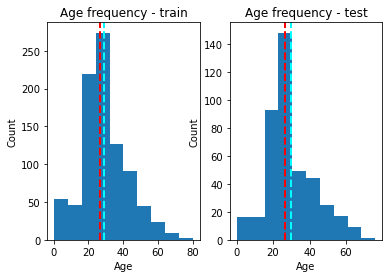

Mean Age train data =  29.31864271664414
Median Age train data =  26.507588932806325
Mean Age test data =  29.579565742292257
Median Age test data =  26.507588932806325


In [190]:
age_train = df_train['Age']
age_test = df_test['Age']

plt.subplot(1,2,1)
plt.hist(age_train)
plt.axvline(x=age_train.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=age_train.median(), color = 'red', linestyle='dashed', linewidth = 2)
plt.title('Age frequency - train')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.hist(age_test)
plt.axvline(x=age_test.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=age_test.median(), color = 'red', linestyle='dashed', linewidth = 2)
plt.title('Age frequency - test')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

print('Mean Age train data = ', age_train.mean())
print('Median Age train data = ', age_train.median())
print('Mean Age test data = ', age_test.mean())
print('Median Age test data = ', age_test.median())

Conclutions:
* Most if the Age lie between 20-40yrs
* The mean in both datasets (train-test) are very similar.

Now we are going to plot the age vs class vs survived|no-survived

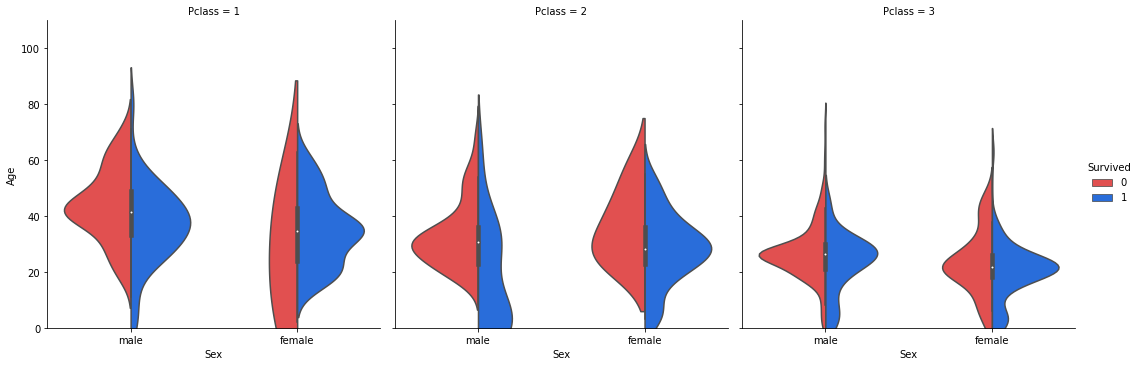

In [191]:
import seaborn as sns
palette ={0: "#F93838", 1: "#0C66F7"}
sns.catplot(x = 'Sex', y = 'Age', hue = 'Survived', col = 'Pclass', data = df_train, kind = 'violin', split = True, palette=palette)
plt.ylim([0,110]);

Using violin-like plot is easy to understand multiple class variable graphs like this.
In conclusion:
* Passenger with age <20 are most likely to survive. 
* Again female passengers are most likely to survive.

# Number of siblings/spouses vs Survived

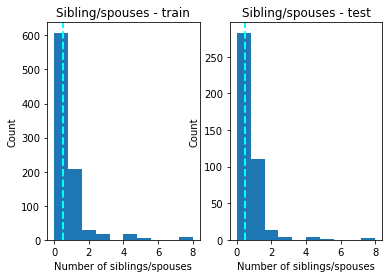

Mean Age train data =  0.5230078563411896
Mean Age test data =  0.4473684210526316


In [192]:
sbsp_train = df_train['SibSp']
sbsp_test = df_test['SibSp']

plt.subplot(1,2,1)
plt.hist(sbsp_train)
plt.axvline(x=sbsp_train.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
plt.title('Sibling/spouses - train')
plt.xlabel('Number of siblings/spouses')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.hist(sbsp_test)
plt.axvline(x=sbsp_test.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
plt.title('Sibling/spouses - test')
plt.xlabel('Number of siblings/spouses')
plt.ylabel('Count')

plt.show()

print('Mean Age train data = ', sbsp_train.mean())
print('Mean Age test data = ', sbsp_test.mean())

The distribution in both train and test datasets are pretty much the same..
* Most density lie between 0 - 2 sib/sp

Let's compare it with de survival label

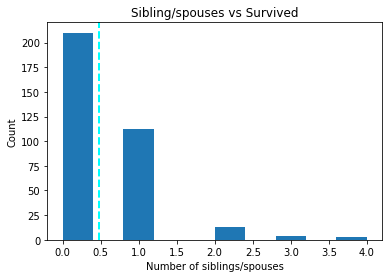

In [193]:
sbsp_surv = df_train.SibSp[df_train.Survived == 1] 

plt.hist(sbsp_surv)
plt.axvline(x=sbsp_surv.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
plt.title('Sibling/spouses vs Survived')
plt.xlabel('Number of siblings/spouses')
plt.ylabel('Count')
plt.show()

As count of family members on board increases, the rate of survival seems to go down.

# Number of parents/children vs Survived

Similar analysis to siblings/spouses.

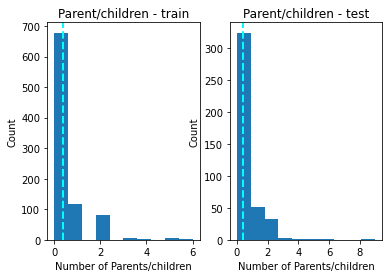

Mean Age train data =  0.38159371492704824
Mean Age test data =  0.3923444976076555


In [194]:
parch_train = df_train['Parch']
parch_test = df_test['Parch']

plt.subplot(1,2,1)
plt.hist(parch_train)
plt.axvline(x=parch_train.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
plt.title('Parent/children - train')
plt.xlabel('Number of Parents/children')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.hist(parch_test)
plt.axvline(x=parch_test.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
plt.title('Parent/children - test')
plt.xlabel('Number of Parents/children')
plt.ylabel('Count')

plt.show()

print('Mean Age train data = ', parch_train.mean())
print('Mean Age test data = ', parch_test.mean())

The distribution is very similar to the sibling/spouses. The mean is around 0,4-0.5 in both cases.
Now let's see the survival distribution..

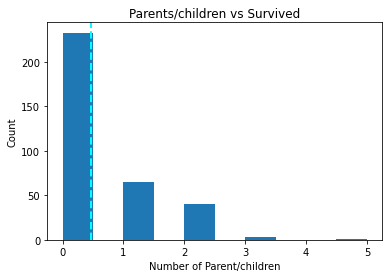

In [195]:
parch_surv = df_train.Parch[df_train.Survived == 1] 

plt.hist(parch_surv)
plt.axvline(x=parch_surv.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
plt.title('Parents/children vs Survived')
plt.xlabel('Number of Parent/children')
plt.ylabel('Count')
plt.show()

Very similar result again compared to sibling/spouses survival distribution.
We need a more normalized graph due the histogram is only influenced by the frequency and not by the ratio and passenger count.
Let's use seaborn catplot to see a more realistic categorical graph of the situation..

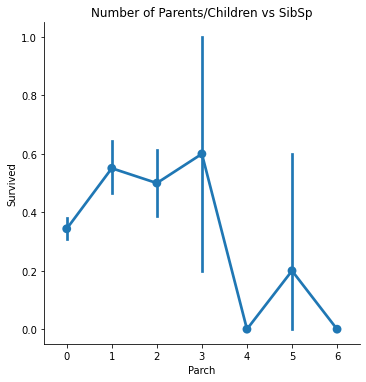

In [196]:
sns.catplot(x = 'Parch', y = 'Survived', kind = 'point', data = df_train)
plt.title('Number of Parents/Children vs SibSp');

For passengers with more tan 3 family members their survival ratio seems to drastically decrease.

# Fare vs Survived 

In a first approach is easy to think that passengers with a large fare are most likely to be resqued due a higher socio-economic status.
Anyway we can explore the data to find the insights on it.

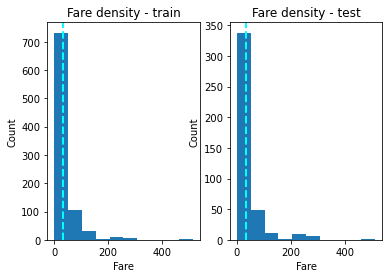

Mean Fare train data =  32.2042079685746
Median Fare train data =  14.4542
Mean Fare test data =  35.6271884892086
Median Fare test data =  14.4542


In [197]:
fare_train = df_train['Fare']
fare_test = df_test['Fare']

plt.subplot(1,2,1)
plt.hist(fare_train)
plt.axvline(x=fare_train.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
plt.title('Fare density - train')
plt.xlabel('Fare')
plt.ylabel('Count')

plt.subplot(1,2,2)
plt.hist(fare_test)
plt.axvline(x=fare_test.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
plt.title('Fare density - test')
plt.xlabel('Fare')
plt.ylabel('Count')

plt.show()

print('Mean Fare train data = ', fare_train.mean())
print('Median Fare train data = ', fare_train.median())
print('Mean Fare test data = ', fare_test.mean())
print('Median Fare test data = ', fare_test.median())

Most of the fare lies between 0-100 in both training and test sets

Text(0.5, 1.0, 'Fare vs survival density')

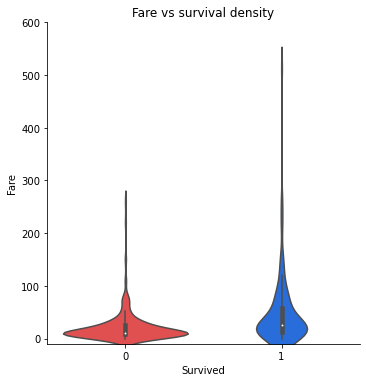

In [198]:
sns.catplot(x = 'Survived', y = 'Fare', data = df_train, kind = 'violin', split = True, palette=palette)
plt.ylim([-10,600]);
plt.title('Fare vs survival density')

From the violin-type graph is more easy to understand the situation.
* The red graph is telling us that the peope with less fare has a less survival ratio
* Passengers with a >300 fare were resqued and has survived.

In [199]:
df_test[df_test.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


We have a Nan value in the Fare test data.. let's fill it!
* The passenger belongs to Pclass 3 (lowest)
* Due the Class 3 is the most popular, we can use the mean criteria of the class3 to fill the Nan value.

In [200]:
pclass3_fare_mean_train = df_train[(df_train.Pclass == 3)].Fare.mean()
pclass3_fare_mean_test = df_test[(df_test.Pclass == 3)].Fare.mean()

pclass3_fare_mean = (pclass3_fare_mean_test + pclass3_fare_mean_train) / 2 

In [201]:
df_test.Fare = df_test.Fare.fillna(pclass3_fare_mean)

In [202]:
df_test[df_test.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Fare Nan are now filled correctly!

# Embarkment vs survived

There are 3 ports where people boarded the Titanic.
* C - Cherbourg
* Q - Queenston
* S - Southampton

In [203]:
df_train.Embarked.isna().sum()

2

Before a further analysis we need to fill the Nans values in the dataset embarked column..
Using a similar procedure to Age filling.

In [204]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent', verbose=0) 

embarked = (df_train.iloc[:, 11].values).reshape(-1,1)    #Embarked column extraction and reshape
imputer_1 = imputer.fit(embarked)                           #Imputer fit
df_train['Embarked'] = (imputer_1.transform(embarked)).reshape(-1,)   #New embarked column replace into dataframe

In [205]:
df_train.Embarked.isna().sum()

0

All the Nans were filled correctly.. now we reply the procedure but in the test data.

In [206]:
df_test.Embarked.isna().sum()

0

In [207]:

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent', verbose=0) 

embarked = (df_test.iloc[:, 10].values).reshape(-1,1)    #Embarked column extraction and reshape
imputer_1 = imputer.fit(embarked)                           #Imputer fit
df_test['Embarked'] = (imputer_1.transform(embarked)).reshape(-1,)   #New embarked column replace into dataframe

In [208]:
df_test[df_test.Embarked.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


After filled are the Nan values, we can start our data analysis.
Les's start looking the embarked class frecuency in the dataset.

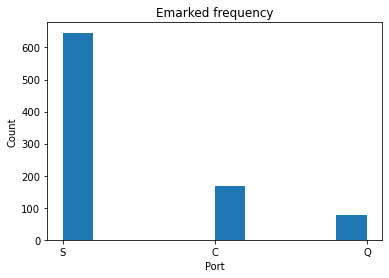

In [209]:
embk = df_train['Embarked']
plt.hist(embk, align = 'mid')
plt.title('Emarked frequency')
plt.xlabel('Port')
plt.ylabel('Count')
plt.show()

Most of the people started their journey from Southampton.

Let's find some correlation between embarked port and the survival rate using categorical plot from seaborbn.

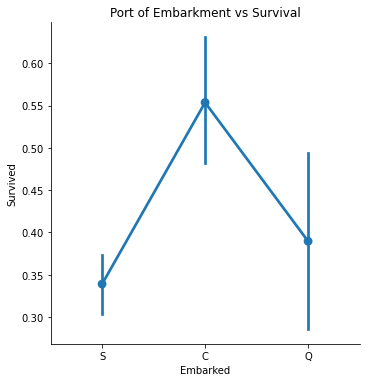

In [210]:
sns.catplot(x = 'Embarked', y = 'Survived', data = df_train, kind = 'point')
plt.title('Port of Embarkment vs Survival')
plt.show()

Passengers from Cherbourg had a high rate of survival. Southampton (most popular embarked) had the lowest one.

We can find more answers in Pclass vs Embarked graph.

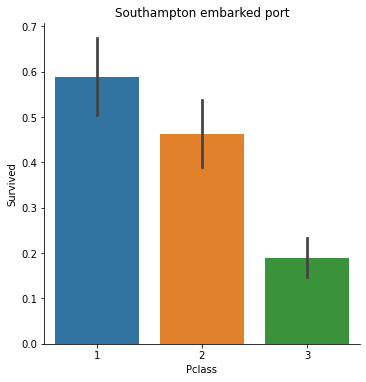

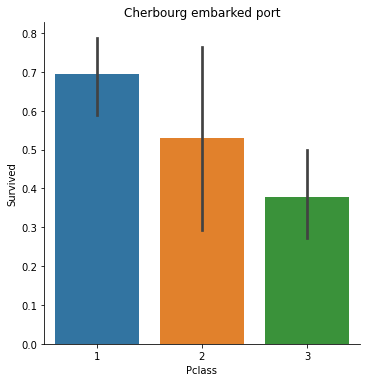

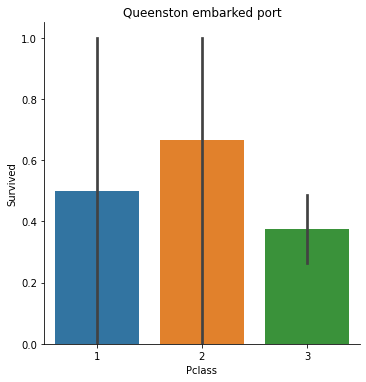

In [211]:
S = df_train[df_train.Embarked == 'S']
C = df_train[df_train.Embarked == 'C']
Q = df_train[df_train.Embarked == 'Q']

sns.catplot(x = S.Pclass, y = 'Survived', data = df_train, kind = 'bar')
plt.title('Southampton embarked port')
sns.catplot(x = C.Pclass, y = 'Survived', data = df_train, kind = 'bar')
plt.title('Cherbourg embarked port')
sns.catplot(x = Q.Pclass, y = 'Survived', data = df_train, kind = 'bar')
plt.title('Queenston embarked port')

plt.show()

* As expected, Cherbourg had (in proportion) the most Pclass1 passengers this is why the high survival ratio.
* Queenston in the other side, had the lowest Pclass1 passengers and therefore a lower survival ratio.
* Southampton had a big part of Pclass3 passengers.

# Data cleaning and depuration

## Non relevant data

After a detailed data analysis and correlation searching, we can conclude that the only variable that doesn't help in the survival prediction is the Cabin number. And this is why cabin number is composed by a letter wich is related to the Pclass and Fare and by a number that doesn't help at all.
We can drop the entire column from the dataframe to improve our algorithm performance and to prevent noise in the prediction process.

PassengerId is another column that we can eliminate. This number is just to identify the observations. 

In [212]:
#df_train.drop('Cabin', axis = 1, inplace = True)
#df_test.drop('Cabin', axis = 1, inplace = True)

df_train.drop('PassengerId', axis = 1, inplace = True)
df_test.drop('PassengerId', axis = 1, inplace = True)

df_train.drop('Ticket', axis = 1, inplace = True)
df_test.drop('Ticket', axis = 1, inplace = True)

## Categorical Data codification

Categorical data is the data that is composed by categories wich can be numbers (1, 2, 3, etc) or strings (A, B, C, etc).
To take profit of this kind of data and also to feed our ML algorithm we need to codify this data in a meaningfull form.
With sklearn library we have Label Encoder and OneHotEncoder to accomplish the task.

In the Titanic DataFrame we have 3 categorical data columns:
* Col[1] - Pclass. We have 3 classes. Only 2 column filled with 1 and 0 is enought to represent the passenger class.
* Col[3] - Sex. We can split it in to a 2 column with 1 and 0 to identify a male/female passenger. Also beacause redundancy, with 1 column we can identify the passenger gender.
* Col[9] - Embarked. 3 different ports can be represented with 2 columns filled with 1 and 0.
* Cabin - 9 different values

In the case of the Cabin feature we need to apply first a name cleaning to keep only the first letter. Then change each letter for a number wich will be encoded.

In [213]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.00,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,30.0000,C148,C


In [214]:
df_train.Cabin.fillna('0', inplace = True)
df_train.loc[df_train['Cabin'].str.contains("A", na = False), 'Cabin'] = 1
df_train.loc[df_train['Cabin'].str.contains("B", na = False), 'Cabin'] = 2
df_train.loc[df_train['Cabin'].str.contains("C", na = False), 'Cabin'] = 3
df_train.loc[df_train['Cabin'].str.contains("D", na = False), 'Cabin'] = 4
df_train.loc[df_train['Cabin'].str.contains("E", na = False), 'Cabin'] = 5
df_train.loc[df_train['Cabin'].str.contains("F", na = False), 'Cabin'] = 6
df_train.loc[df_train['Cabin'].str.contains("G", na = False), 'Cabin'] = 7
df_train.loc[df_train['Cabin'].str.contains("T", na = False), 'Cabin'] = 8

df_test.Cabin.fillna('0', inplace = True)
df_test.loc[df_test['Cabin'].str.contains("A", na = False), 'Cabin'] = 1
df_test.loc[df_test['Cabin'].str.contains("B", na = False), 'Cabin'] = 2
df_test.loc[df_test['Cabin'].str.contains("C", na = False), 'Cabin'] = 3
df_test.loc[df_test['Cabin'].str.contains("D", na = False), 'Cabin'] = 4
df_test.loc[df_test['Cabin'].str.contains("E", na = False), 'Cabin'] = 5
df_test.loc[df_test['Cabin'].str.contains("F", na = False), 'Cabin'] = 6
df_test.loc[df_test['Cabin'].str.contains("G", na = False), 'Cabin'] = 7
df_test.loc[df_test['Cabin'].str.contains("T", na = False), 'Cabin'] = 8

In [215]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,7.2500,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,71.2833,3,C
2,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,7.9250,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,53.1000,3,S
4,0,3,"Allen, Mr. William Henry",male,35.00,0,0,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,13.0000,0,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,30.0000,2,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,23.4500,0,S
889,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,30.0000,3,C


The following function is designed to encode all the categorical variables.

In [216]:
def data_encode(dataframe, feature):
    dummies = pd.get_dummies(dataframe[feature], prefix = feature)
    df = pd.concat([dataframe, dummies], axis = 1)
    #df = df.drop([feature], axis = 1)
    return(df)
to_encode = ['Pclass', 'Sex', 'Embarked', 'Cabin']

for feature in to_encode:
    df_train = data_encode(df_train, feature)
    df_test = data_encode(df_test, feature)
    
#df_train = df_train.drop(['Pclass_3', 'Sex_male', 'Embarked_S','Cabin_0'], axis = 1)
#df_test = df_test.drop(['Pclass_3', 'Sex_male', 'Embarked_S', 'Cabin_0'], axis = 1)

All the categorical variables were encoded!

In [217]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,...,Embarked_S,Cabin_1,Cabin_2,Cabin_3,Cabin_4,Cabin_5,Cabin_6,Cabin_7,Cabin_8,Cabin_0
0,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,7.2500,0,S,...,1,0,0,0,0,0,0,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,71.2833,3,C,...,0,0,0,1,0,0,0,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,7.9250,0,S,...,1,0,0,0,0,0,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,53.1000,3,S,...,1,0,0,1,0,0,0,0,0,0
4,0,3,"Allen, Mr. William Henry",male,35.00,0,0,8.0500,0,S,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,13.0000,0,S,...,1,0,0,0,0,0,0,0,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,30.0000,2,S,...,1,0,1,0,0,0,0,0,0,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,23.4500,0,S,...,1,0,0,0,0,0,0,0,0,1
889,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,30.0000,3,C,...,0,0,0,1,0,0,0,0,0,0


In [218]:
df_test['Cabin_8'] = 0

## Feature Engineering

Now is time to transform the dataframe into a more usefull one. The following transformations are needed:
* Family members combine. Adding sibling/spouses and parent/children in just 1 category and then divide it in to a different categories.
* Add 1 to the family number to count the evaluated passenger
* Passenger name cleaning to create a categorical feature.
* New age-dependent categories

### FAMILY



In [219]:
df_train['Family'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['Family'] = df_train['SibSp'] + df_train['Parch'] + 1

#df_train.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
#df_test.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

After add both family features and convert it. We can make a quick data analysis to understand the results.

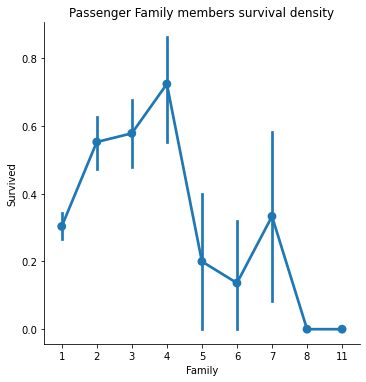

In [220]:
sns.catplot(x = 'Family', y = 'Survived', kind = 'point', data = df_train)
plt.title('Passenger Family members survival density')
plt.show()

* For 1< Family < 3 the survival chance is the highest.
* For 4< Family < 6 the survival chance is lower
* For Family > 6 the survival chance is the lowest
* For Family = 0 the survival chance is lower.

Lets create the following categories:
* Single       -->       passengers == 1
* SmallFamily  -->  2 <= passengers <= 4
* MediumFamily -->  5 <= passengers <= 7
* LargeFamily  -->  8 <= passengers

In [221]:
df_train['Single'] = df_train['Family'].map(lambda s: 1 if s == 1 else 0)
df_train['SmallFamily'] = df_train['Family'].map(lambda s: 1 if (2 <= s <= 4) else 0)
df_train['MediumFamily'] = df_train['Family'].map(lambda s : 1 if (5 <= s <= 7) else 0)
df_train['LargeFamily'] = df_train['Family'].map(lambda s:1  if 7 < s else 0)

df_test['Single'] = df_test['Family'].map(lambda s: 1 if s == 1 else 0)
df_test['SmallFamily'] = df_test['Family'].map(lambda s: 1 if (2 <= s <= 4) else 0)
df_test['MediumFamily'] = df_test['Family'].map(lambda s : 1 if (5 <= s <= 7) else 0)
df_test['LargeFamily'] = df_test['Family'].map(lambda s:1  if 7 < s else 0)

In [222]:
single_surv = df_train[(df_train.Survived == 1) & (df_train.Single == 1)].Survived.count() / (df_train[df_train.Single == 1]).Single.count()

smallF_surv = df_train[(df_train.Survived == 1) & (df_train.SmallFamily == 1)].Survived.count() / (df_train[df_train.SmallFamily == 1]).SmallFamily.count()

mediumF_surv = df_train[(df_train.Survived == 1) & (df_train.MediumFamily == 1)].Survived.count() / (df_train[df_train.MediumFamily == 1]).MediumFamily.count()

largeF_surv = df_train[(df_train.Survived == 1) & (df_train.LargeFamily == 1)].Survived.count() / (df_train[df_train.LargeFamily == 1]).LargeFamily.count()

Text(0, 0.5, 'Survival Rate')

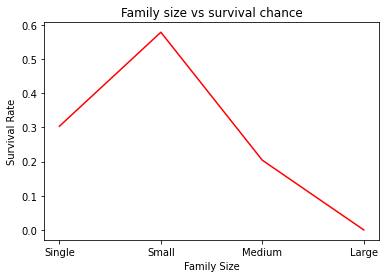

In [223]:
x = ['Single', 'Small', 'Medium', 'Large']
y = [single_surv, smallF_surv, mediumF_surv, largeF_surv]

plt.plot(x,y, 'r-')
plt.title('Family size vs survival chance')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')

The graph represent the Survival rate of our new family categories.

Now we can drop the family count feature due is no more necesary for the study. And also drop one of the family sizes to prevent data rendundancy

In [224]:
#df_train.drop(['LargeFamily'], axis = 1, inplace = True)
#df_test.drop(['LargeFamily'], axis = 1, inplace = True)

In [225]:
#df_train.drop(['Family'], axis = 1, inplace = True)
#df_test.drop(['Family'], axis = 1, inplace = True)

### Name cleaning and transformation

The idea is first to clean the name column, leaving just 1 column with the title value.
Then analize the data to make some further transformation.

In [226]:
df_train['Surname'] = df_train['Name'].str.split(',').str[0]
df_train['Title'] = df_train['Name'].str.split(',').str[1].str.split('.').str[0]

df_test['Title'] = df_test['Name'].str.split(',').str[1].str.split('.').str[0]

In [227]:
df_train.drop(['Name', 'Surname'], axis = 1, inplace = True )
df_test.drop(['Name'], axis = 1, inplace = True)

<AxesSubplot:>

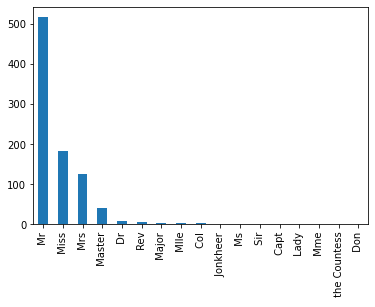

In [228]:
df_train['Title'].value_counts().plot(kind='bar')

We have a lot of titles in the dataframe. We can create new categories mapping the names in the following classes:
* Capt --> Officer
* Col --> Officer
* Major --> Officer
* Dr --> Officer
* Rev --> Officer

* Jonkheer --> Royalty
* Don --> Royalty
* Sir --> Royalty
* the Countess --> Royalty
* Lady --> Royalty

* Mme --> Mrs
* Mrs --> Mrs
* Ms --> Mrs

* Mlle --> Miss
* Miss --> Miss

* Mr --> Mr
* Master --> Master

In [229]:
df_train['Title'] = (df_train['Title'].astype('|S'))   #Convert the dtype=object to byte (almost string)
df_test['Title'] = df_test['Title'].astype('|S')

In [230]:
df_train['Officer'] = df_train['Title'].map(lambda s: 1 if s == b' Capt' or
                                            s == b' Col' or
                                            s == b' Major' or
                                            s == b' Dr' or
                                            s == b' Rev' else 0)

df_train['Royalty'] = df_train['Title'].map(lambda s: 1 if s == b' Jonkheer' or
                                            s == b' Don' or
                                            s == b' Sir' or
                                            s == b' the Countess' or
                                            s == b' Lady' else 0)

df_train['Mrs'] = df_train['Title'].map(lambda s: 1 if s == b' Mrs' or
                                            s == b' Mme' or
                                            s == b' Ms' else 0)

df_train['Miss'] = df_train['Title'].map(lambda s: 1 if s == b' Mlle' or
                                            s == b' Miss'else 0)

df_train['Mr'] = df_train['Title'].map(lambda s: 1 if s == b' Mr' else 0)

df_train['Master'] = df_train['Title'].map(lambda s: 1 if s == b' Master' else 0)

In [231]:
df_test['Officer'] = df_test['Title'].map(lambda s: 1 if s == b' Capt' or
                                            s == b' Col' or
                                            s == b' Major' or
                                            s == b' Dr' or
                                            s == b' Rev' else 0)

df_test['Royalty'] = df_test['Title'].map(lambda s: 1 if s == b' Jonkheer' or
                                            s == b' Don' or
                                            s == b' Sir' or
                                            s == b' the Countess' or
                                            s == b' Lady' else 0)

df_test['Mrs'] = df_test['Title'].map(lambda s: 1 if s == b' Mrs' or
                                            s == b' Mme' or
                                            s == b' Ms' else 0)

df_test['Miss'] = df_test['Title'].map(lambda s: 1 if s == b' Mlle' or
                                            s == b' Miss'else 0)

df_test['Mr'] = df_test['Title'].map(lambda s: 1 if (s == b' Mr') else 0)

df_test['Master'] = df_test['Title'].map(lambda s: 1 if s == b' Master' else 0)


Now with a clean dataframe is time to analize the influence of the title in the survival rate.
First plotting a frequency vs title and then a survival density vs title.

From the second graph we can conclude:
* Mr (male gender) had the lowest survival rate
* Mrs (female) is the Title with highest survival rate
* Miss (female) is very similar to Mrs.
* Master (male) is the 3rd higher survival rate title.
* Rare Titles are in the 4/5 higher survival rate title.

Let's see the dataframe again..

In [232]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass_1,...,SmallFamily,MediumFamily,LargeFamily,Title,Officer,Royalty,Mrs,Miss,Mr,Master
0,0,3,male,22.00,1,0,7.2500,0,S,0,...,1,0,0,b' Mr',0,0,0,0,1,0
1,1,1,female,38.00,1,0,71.2833,3,C,1,...,1,0,0,b' Mrs',0,0,1,0,0,0
2,1,3,female,26.00,0,0,7.9250,0,S,0,...,0,0,0,b' Miss',0,0,0,1,0,0
3,1,1,female,35.00,1,0,53.1000,3,S,1,...,1,0,0,b' Mrs',0,0,1,0,0,0
4,0,3,male,35.00,0,0,8.0500,0,S,0,...,0,0,0,b' Mr',0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,0,S,0,...,0,0,0,b' Rev',1,0,0,0,0,0
887,1,1,female,19.00,0,0,30.0000,2,S,1,...,0,0,0,b' Miss',0,0,0,1,0,0
888,0,3,female,21.75,1,2,23.4500,0,S,0,...,1,0,0,b' Miss',0,0,0,1,0,0
889,1,1,male,26.00,0,0,30.0000,3,C,1,...,0,0,0,b' Mr',0,0,0,0,1,0


We can drop the title feature due is now encoded in the differents titles!

In [233]:
df_test.drop(['Title'], axis = 1, inplace = True)
df_train.drop(['Title'], axis = 1, inplace = True)

Now we have a clean and categorical encode dataframe. 
Before try some ML predictions is necesary to scale all the numeric variables, in this case:
* Age
* Fare
* Family


### Age

In [234]:
df_train['Infant'] = df_train['Age'].map(lambda s: 1 if s < 1 else 0)
df_train['Child'] = df_train['Age'].map(lambda s: 1 if (1 <= s <= 11) else 0)
df_train['Teen'] = df_train['Age'].map(lambda s : 1 if (12 <= s <= 17) else 0)
df_train['Adult'] = df_train['Age'].map(lambda s:1  if (18 <= s <= 64) else 0)
df_train['Adult+'] = df_train['Age'].map(lambda s:1  if 64 < s else 0)

df_test['Infant'] = df_test['Age'].map(lambda s: 1 if s < 1 else 0)
df_test['Child'] = df_test['Age'].map(lambda s: 1 if (1 <= s <= 11) else 0)
df_test['Teen'] = df_test['Age'].map(lambda s : 1 if (12 <= s <= 17) else 0)
df_test['Adult'] = df_test['Age'].map(lambda s:1  if (18 <= s <= 64) else 0)
df_test['Adult+'] = df_test['Age'].map(lambda s:1  if 64 < s else 0)

In [235]:
#df_train.drop(['Age', 'Adult+'], axis = 1, inplace = True)
#df_test.drop(['Age', 'Adult+'], axis = 1, inplace = True)

## Numeric Variables Scaling

In [236]:
from sklearn.preprocessing import StandardScaler

In [237]:
scaler = StandardScaler()

#df_train[['Age', 'Fare']] = scaler.fit_transform(df_train[['Age', 'Fare']])
#df_test[['Age', 'Fare']] = scaler.fit_transform(df_test[['Age', 'Fare']])

In [238]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Pclass_1,...,Royalty,Mrs,Miss,Mr,Master,Infant,Child,Teen,Adult,Adult+
0,0,3,male,22.00,1,0,7.2500,0,S,0,...,0,0,0,1,0,0,0,0,1,0
1,1,1,female,38.00,1,0,71.2833,3,C,1,...,0,1,0,0,0,0,0,0,1,0
2,1,3,female,26.00,0,0,7.9250,0,S,0,...,0,0,1,0,0,0,0,0,1,0
3,1,1,female,35.00,1,0,53.1000,3,S,1,...,0,1,0,0,0,0,0,0,1,0
4,0,3,male,35.00,0,0,8.0500,0,S,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,0,S,0,...,0,0,0,0,0,0,0,0,1,0
887,1,1,female,19.00,0,0,30.0000,2,S,1,...,0,0,1,0,0,0,0,0,1,0
888,0,3,female,21.75,1,2,23.4500,0,S,0,...,0,0,1,0,0,0,0,0,1,0
889,1,1,male,26.00,0,0,30.0000,3,C,1,...,0,0,0,1,0,0,0,0,1,0


Lest see the corretalation matrix, this will help us understand the weith of the variables in the Survival chance of each passenger.

<AxesSubplot:>

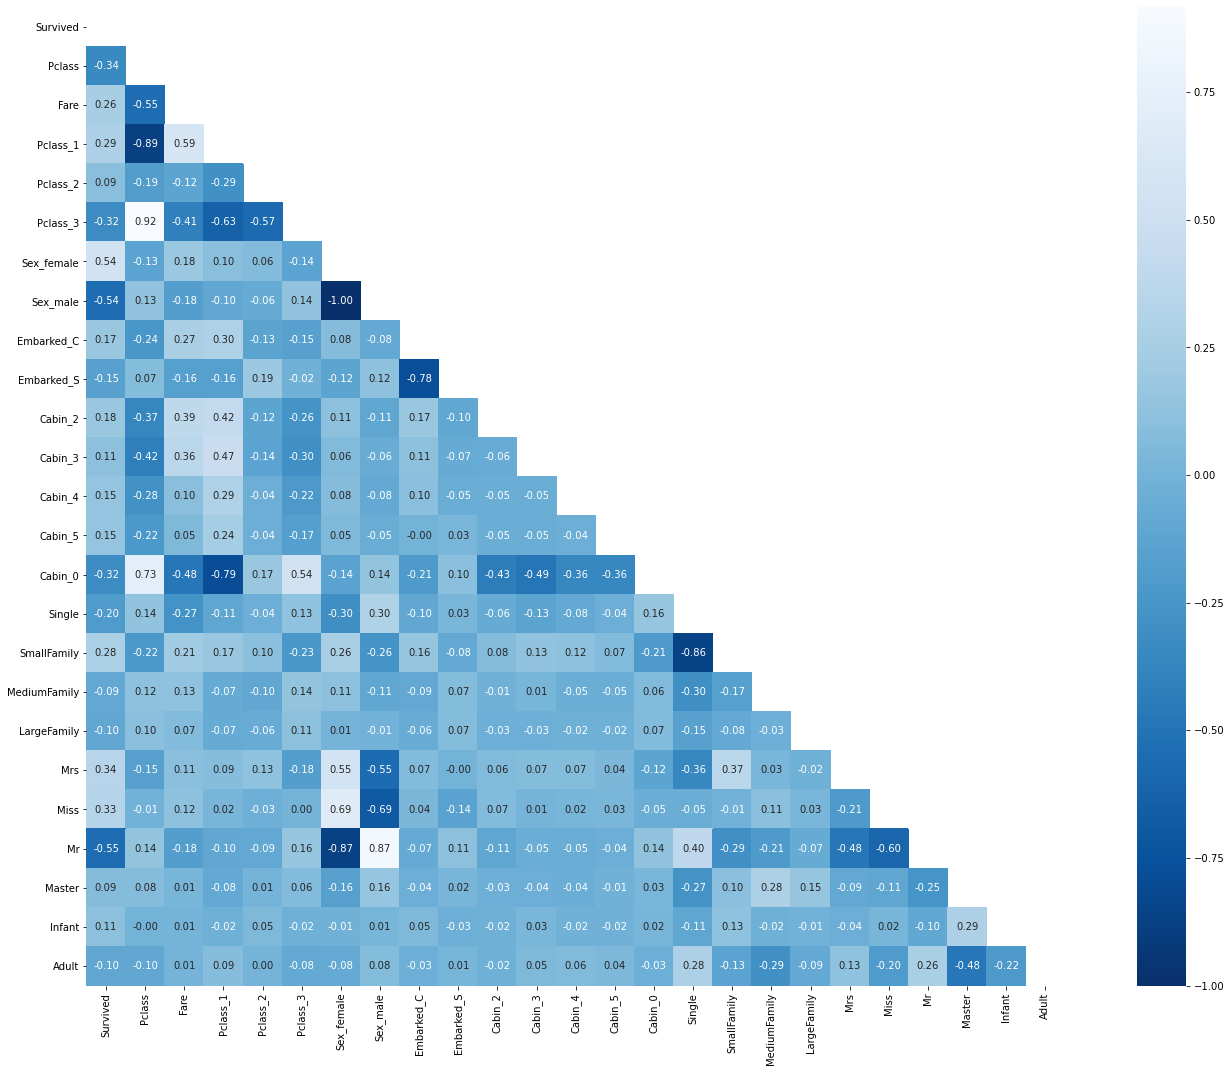

In [258]:
f, ax = plt.subplots(figsize=(26, 18))
corr = df_train.corr()
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
#            square=True, ax=ax)
sns.heatmap(corr,
            annot = True,
            fmt = '.2f',
            square = True,
            cmap = "Blues_r",
            mask = np.triu(corr))

In [263]:
df_train.drop(['Embarked_Q', 'SibSp', 'Cabin_1','Cabin_6', 'Cabin_7', 'Cabin_8', 'Family', 'Officer', 'Royalty'], axis = 1, inplace = True)

df_train.drop(['Sex'], axis = 1, inplace = True)
df_train.drop(['Embarked'], axis = 1, inplace = True)

df_train.drop(['Teen', 'Child','Adult+','Age', 'Parch'], axis = 1, inplace = True)
df_train.drop(['Master', 'MediumFamily','Pclass_2'], axis = 1, inplace = True)

Finally we have a complete clean and usefull dataset to feed a ML algorithm and make some predictions!



# Machine Learning model Fitting

Before make some predictions is necesary to:
* Split the dataframe into Training and test sets
* ML model selection
* Model training and validation

## Dataframe training/test split

The idea is split our training data into 2 datasets to train and validate our algorithm.

First lets convert the dataframe into a X (features) and y(label) numpy arrays.

In [71]:
from sklearn.model_selection import train_test_split

In [264]:
X = df_train.iloc[:,1:].values
#X = df_train.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,21,22,23,24,25,26]].values
y = df_train.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Model selection

For model selection we are going to use Classifier algorithms.
Due the nature of our data, Random Forest is the best choice for our application.

### RANDOM FOREST

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [265]:
classifier = RandomForestClassifier(n_estimators = 650,
                                    criterion = 'gini',
                                    min_samples_leaf = 1,
                                    min_samples_split = 12,
                                    n_jobs = -1,
                                    random_state = 0)

#650,1,12
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

Lets see how it performs trying to predict our test dataset and using metrics and confussion matrix.

In [266]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[1,1]    #True positive
TN = cm[0,0]    #True negative
FP = cm[1,0]    #False positive
FN = cm[0,1]    #False negative

accuracy = (TP+TN) / (np.sum(cm))
pressition = (TP)/(TP+FP)
recall = (TP)/(TP+FN)
F1_score = (2*pressition*recall) / (pressition+recall)

print('Accuracy = ', accuracy)
print('Precision = ', pressition)
print('Recall = ', recall)
print('F1_score = ', F1_score)
print('Confussion matrix = ', cm)

Accuracy =  0.8156424581005587
Precision =  0.6956521739130435
Recall =  0.8
F1_score =  0.7441860465116279
Confussion matrix =  [[98 12]
 [21 48]]


#### First approach
* Accuracy =  0.826
* Precision =  0.768
* Recall =  0.779
* F1_score =  0.773
* Confussion matrix =  [[95 15]

                        [16 53]
#### Second approach
* Accuracy =  0.843
* Precision =  0.753
* Recall =  0.825
* F1_score =  0.7878
* Confussion matrix =  [[99 11]

                        [17 52]
#### Third approach
* Accuracy =  0.837
* Precision =  0.681
* Recall =  0.87
* F1_score =  0.764
* Confussion matrix =  [[103 7]

                        [22 47]
#### Fourth approach
* Accuracy =  0.854
* Precision =  0.753
* Recall =  0.852
* F1_score =  0.8
* Confussion matrix =  [[101 9]

                        [17 52]
                        
 

## Grid search model optimization

All the ML models have a lot of parameters (hyperparameters) wich describe the way that the algoritm perform into the data.
In order to optimize that parameters is necesary to implement a grid search optimization.

In [ ]:
from sklearn.model_selection import GridSearchCV

First define a dictionary with the parameters to optimize.

In [ ]:
parameters = [{'n_estimators' : [450,500,550],
               'criterion' : ['gini'],
               'min_samples_leaf' : [4,5,6,7],
               'min_samples_split' : [8,9,10,11]}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

Now lest run the grid search and then print the best accuracy and parameters reached.

In [ ]:
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Best Accuracy = ', best_accuracy)
print('Best parameters  = ', best_parameters)

Is necesary to run the grid search changing the parameters frecuently to see what are the best for the prediction.

1st Run = {'criterion': 'gini',
             'min_samples_leaf': 2,
             'min_samples_split': 22,
             'n_estimators': 750} - Acc = 0.8413
             
2st Run = {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 680} - Acc = 0.8413

3rd Run = {'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 17, 'n_estimators': 650} - Acc = 0.837

# Feature Selection

All the features that now we have can have a positive or negative impact in our prediction. Each feature has his own little impact in the overall performance of the prediction algorithm.
The idea in this section is to drop all the features that doesn't help at all to prevent data noise, overfitting and low accuracy.

First lets see a bar graph that represent the importances of the features.

In [ ]:
features = pd.DataFrame()
features['feature'] = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2',
       'Sex_female', 'Embarked_C', 'Embarked_Q', 'Family', 'Single',
       'SmallFamily', 'MediumFamily', 'Officer', 'Royalty', 'Mrs', 'Miss',
       'Mr']
features['Importance'] = classifier.feature_importances_
features.sort_values(by = ['Importance'], ascending = True, inplace = True)
features.set_index('feature', inplace = True)

features.plot(kind = 'barh', figsize = (15,15))

Now using the brilliant sklearn libray we can drop all the no-needed features of our dataset.

In [ ]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(classifier, prefit = True)
X_reduced = model.transform(X)
print(X_reduced.shape)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.2, random_state = 0)

### Artificial Neural Network - ANN

We have 12 input parameters. Different ANN topologies should be tested.
* #1 - 12 -> 6 -> 1
* #2 - 12 -> 14 -> 8 -> 1
* #3 - 12 -> 14 -> 8 -> 14 -> 1

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()

classifier.add(Dense(units = 19,
                     kernel_initializer = 'uniform',
                     activation = 'relu',
                     input_dim = 11))
classifier.add(Dense(units = 16,
                     kernel_initializer = 'uniform',
                     activation = 'relu'))
classifier.add(Dense(units = 16,
                     kernel_initializer = 'uniform',
                     activation = 'relu'))
classifier.add(Dense(units = 1,
                     kernel_initializer = 'uniform',
                     activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [ ]:
seqModel = classifier.fit(X_train, y_train, batch_size = 28, epochs = 200)

In [ ]:
# visualizing losses and accuracy
num_epochs = 200

train_loss = seqModel.history['loss']

train_acc  = seqModel.history['accuracy']

xc         = range(num_epochs)

plt.figure()
plt.plot(xc, train_loss, label = 'Loss')
plt.plot(xc, train_acc, label = 'Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('ANN training metrics')

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
TP = cm[1,1]    #True positive
TN = cm[0,0]    #True negative
FP = cm[1,0]    #False positive
FN = cm[0,1]    #False negative

accuracy = (TP+TN) / (np.sum(cm))
pressition = (TP)/(TP+FP)
recall = (TP)/(TP+FN)
F1_score = (2*pressition*recall) / (pressition+recall)
print('Accuracy = ', accuracy)
print('Precision = ', pressition)
print('Recall = ', recall)
print('F1_score = ', F1_score)
print('Confussion matrix = ', cm)

#### ANN RESULTS
* #1 Topology acc = 0.8212
* #2 Topology acc = 0.843
* #3 Topology acc = 0.832

# Test data prediction and file saving

Now is time to finish what we started!
Lets try our ML model in the titanic test data and see how it performs..

In [ ]:
df_test

In [ ]:
y_pred_test = classifier.predict(df_test.iloc[:,:])

In [ ]:
y_pred_test = (y_pred_test>0.5).reshape(-1)

In [ ]:
p = np.arange(892, 1310,1 ).T

p = np.array((p,y_pred_test.astype(np.int64))).T
p = pd.DataFrame(p, columns=['PassengerID','Survived'])
p.to_csv('Tit_pred.csv',index=False)